In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
print('X : ', X.shape)
print('y: ', y.shape)

X :  (150, 4)
y:  (150,)


### 1. Couper un dataset en 2, train et test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train = ', X_train.shape, ', y_train = ', y_train.shape)
print('X_test = ', X_test.shape, ', y_test = ', y_test.shape)

X_train =  (112, 4) , y_train =  (112,)
X_test =  (38, 4) , y_test =  (38,)


### 2. Création un model d'arbre de décision
    - max_leaf_nodes: cb de feuille dans l'arbre -> niveau de profondeur de l'arbre

In [4]:
model = DecisionTreeClassifier(max_leaf_nodes=4,random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

### 3. Notes pour les informations de l'arbre

        - children_left[i]: id of the left child of node i or -1 if leaf node
        - children_right[i]: id of the right child of node i or -1 if leaf node
        - feature[i]: feature used for splitting node i
        - threshold[i]: threshold value at node i
        - n_node_samples[i]: the number of of training samples reaching node i
        - impurity[i]: the impurity at node i



In [5]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold

In [6]:
print('n_nodes = ', n_nodes)
print('left : ', children_left)
print('right : ', children_right)
print('feature : ', feature)
print('threshold : ', threshold)
# il y a 5 nodes
# enfant à gauche: id 1,3 et 3 enfants sont leaf_node (terminée)
#feature utilisée à couper dataset à node i avec threshold

n_nodes =  7
left :  [ 1 -1  3  5 -1 -1 -1]
right :  [ 2 -1  4  6 -1 -1 -1]
feature :  [ 3 -2  2  3 -2 -2 -2]
threshold :  [ 0.80000001 -2.          4.95000005  1.65000004 -2.         -2.
 -2.        ]


In [7]:
#initialiser 2 arrays: node_depth et is_leaves
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)

In [8]:

print('node_depth: ', node_depth)
print('leaf ?: ', is_leaves )

node_depth:  [0 0 0 0 0 0 0]
leaf ?:  [False False False False False False False]


In [9]:
stack = [(0,0)] #commencer par node de racine (id=0, depth=0)
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth #mise à jour le niveau de profondeur pour node_id
    #comparer les valeurs du node id dans children_left et children_right
    #soit différentes -> node_feuille
    #soit égaux -> node intermédiaire (node coupage)
    is_plit_node = children_left[node_id] != children_right[node_id] 
    if is_plit_node: 
        #ajouter 2 nodes à stack ev leurs  niveaus de profondeurs
        stack.append((children_left[node_id], depth+1))
        stack.append((children_right[node_id], depth+1))
    else:
        #is_plit_node est false --> node feuille 
        # -> mise True pour node_id dans is_leaves
        is_leaves[node_id] = True


In [10]:
print('node_depth: ', node_depth)
print('leaf ?: ', is_leaves )

node_depth:  [0 1 1 2 2 3 3]
leaf ?:  [False  True False False  True  True  True]


In [11]:
print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a split node: go to node 5 if X[:, 3] <= 1.6500000357627869 else to node 6.
		node=4 is a leaf node.
			node=5 is a leaf node.
			node=6 is a leaf node.


### 4. Afficher l'arbre de décision

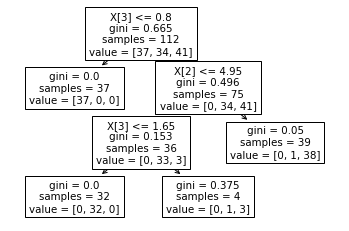

In [12]:
tree.plot_tree(model)
plt.show()

In [13]:
decision_path = model.decision_path(X_test)
#array de node_id des feuilles
leaf_id = model.apply(X_test)
print(decision_path)
print(leaf_id)

  (0, 0)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (3, 2)	1
  (3, 4)	1
  (4, 0)	1
  (4, 1)	1
  (5, 0)	1
  (5, 2)	1
  (5, 4)	1
  (6, 0)	1
  (6, 1)	1
  (7, 0)	1
  (7, 2)	1
  (7, 3)	1
  (7, 5)	1
  (8, 0)	1
  (8, 2)	1
  :	:
  (30, 0)	1
  (30, 2)	1
  (30, 4)	1
  (31, 0)	1
  (31, 2)	1
  (31, 3)	1
  (31, 5)	1
  (32, 0)	1
  (32, 1)	1
  (33, 0)	1
  (33, 2)	1
  (33, 3)	1
  (33, 6)	1
  (34, 0)	1
  (34, 2)	1
  (34, 4)	1
  (35, 0)	1
  (35, 2)	1
  (35, 3)	1
  (35, 5)	1
  (36, 0)	1
  (36, 1)	1
  (37, 0)	1
  (37, 2)	1
  (37, 4)	1
[4 5 1 4 1 4 1 5 5 5 4 5 5 5 5 1 5 5 1 1 6 5 1 1 6 1 1 5 5 1 4 5 1 6 4 5 1
 4]


### 5. Prédiction
    - s/dataset X_test

In [14]:
def prediction_TreeDecision(X_test, clf_model):
    y_pred = clf_model.predict(X_test)
    print('Y_pred: ', y_pred)
    return y_pred

In [18]:
def calcul_accuracy(y_test, y_pred):
    print('Confusion matix')
    print(confusion_matrix(y_test, y_pred))

    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ")
    print(classification_report(y_test, y_pred)) 

In [16]:
y_predict = prediction_TreeDecision(X_test, model)


Y_pred:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [19]:
calcul_accuracy(y_test, y_predict)

Confusion matix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy :  97.36842105263158
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [74]:
print(y_predict.dtype)

int64


Predicted   0   1  2
Actual              
0          13   0  0
1           0  15  1
2           0   0  9


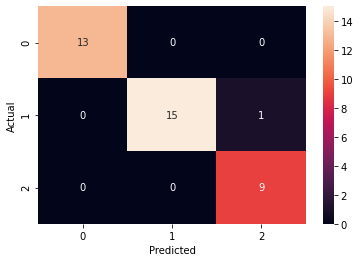

In [21]:
import pandas as pd
import seaborn as sn

data = {'y_actual':y_test, 'y_predict': y_predict     }

df = pd.DataFrame(data, columns=['y_actual','y_predict'])
confuse_matrix = pd.crosstab(df['y_actual'], df['y_predict'], rownames=['Actual'], colnames=['Predicted'])
print (confuse_matrix)
sn.heatmap(confuse_matrix, annot=True)
plt.show()

In [62]:
print(37/38)
print(15/16)

0.9736842105263158
0.9375
